# Домашняя работа по дисциплине "Классическое машинное обучение" 

## Практическое задание №2

Работу выполнил студент Груданов Николай.

---

### **Реализация на Python**

**1. Импорт библиотек и генерация данных**

Сначала импортируем `numpy` для вычислений и `matplotlib` для визуализации. Затем создадим синтетический набор данных для нашей задачи.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Генерируем данные для классификации
# Создадим два облака точек
np.random.seed(42) # для воспроизводимости результатов
n_samples = 200
X = np.random.randn(n_samples, 2)
X[:n_samples//2] = X[:n_samples//2] + 2 # Сдвигаем первое облако
X[n_samples//2:] = X[n_samples//2:] - 2 # Сдвигаем второе облако

# Создаем целевую переменную (метки классов)
y = np.array([0] * (n_samples//2) + [1] * (n_samples//2))

# Добавляем столбец единиц для учета свободного члена (bias)
X = np.hstack([np.ones((n_samples, 1)), X])


**2. Реализация функций**

Теперь напишем три ключевые функции, как требовалось в задании.

In [10]:
def sigmoid(z):
    """Сигмоидная функция"""
    return 1 / (1 + np.exp(-z))


In [11]:
def log_loss(w, X, y):
    """
    Вычисляет логистическую функцию потерь и ее градиент.
    
    Parameters:
    w (np.array): Вектор весов модели.
    X (np.array): Матрица признаков.
    y (np.array): Вектор истинных меток.
    
    Returns:
    tuple: (значение функции потерь, вектор градиента).
    """
    m = X.shape[0]  # Количество объектов
    
    # 1. Вычисляем предсказания (вероятности)
    z = np.dot(X, w)
    A = sigmoid(z)
    
    # Добавляем небольшую константу, чтобы избежать log(0)
    epsilon = 1e-5
    
    # 2. Вычисляем функцию потерь (Log Loss)
    loss = -1/m * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))
    
    # 3. Вычисляем градиент
    grad = 1/m * np.dot(X.T, (A - y))
    
    return loss, grad

In [12]:
def optimize(w, X, y, n_iterations, eta):
    """
    Оптимизирует веса модели с помощью градиентного спуска.
    
    Parameters:
    w (np.array): Начальные веса.
    X (np.array): Матрица признаков.
    y (np.array): Вектор истинных меток.
    n_iterations (int): Количество итераций.
    eta (float): Скорость обучения (learning rate).
    
    Returns:
    tuple: (оптимизированные веса, список потерь на каждой итрации).
    """
    losses = []
    
    for i in range(n_iterations):
        # Вычисляем потери и градиент на текущем шаге
        loss, grad = log_loss(w, X, y)
        
        # Обновляем веса
        w = w - eta * grad
        
        losses.append(loss)
        
    return w, losses

In [13]:
def predict(w, X, b=0.5):
    """
    Делает предсказания классов на основе обученных весов.
    
    Parameters:
    w (np.array): Обученные веса.
    X (np.array): Матрица признаков.
    b (float): Порог для классификации.
    
    Returns:
    np.array: Вектор предсказанных меток (0 или 1).
    """
    # Вычисляем вероятности
    A = sigmoid(np.dot(X, w))
    
    # Применяем порог для получения классов
    y_predicted = (A >= b).astype(int)
    
    return y_predicted

**3. Запуск эксперимента и оценка результатов**

Теперь объединим все вместе: обучим модель, посмотрим, как менялась функция потерь, и оценим точность.

Оптимальные веса: [-0.24 -2.43 -1.75]
Точность модели: 100.00%


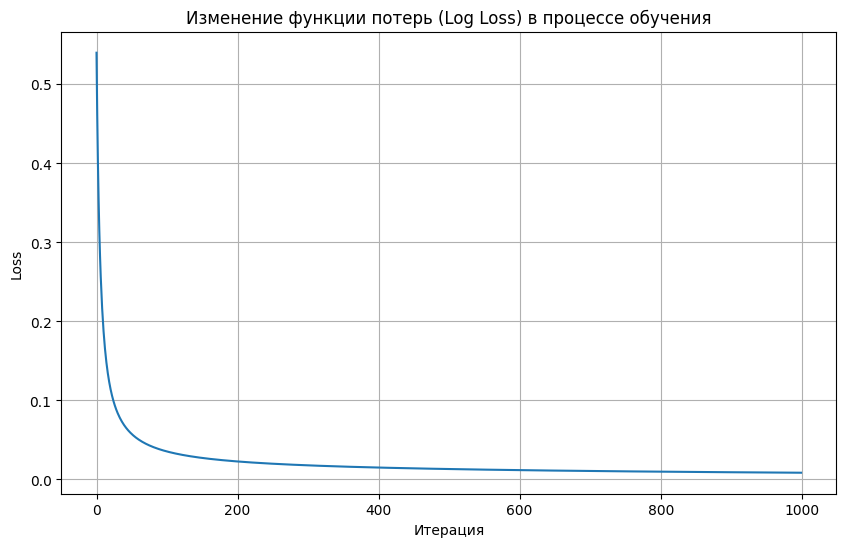

In [14]:
# Задаем гиперпараметры
n_iterations = 1000
eta = 0.1 # Скорость обучения

# Инициализируем веса случайными значениями
# Размерность весов равна количеству признаков + 1 (для bias)
w_init = np.random.randn(X.shape[1])

# Обучаем модель
w_optimal, losses = optimize(w_init, X, y, n_iterations, eta)

# Делаем предсказания на тех же данных
y_pred = predict(w_optimal, X)

# Оцениваем качество
accuracy = np.mean(y_pred == y) * 100

print(f"Оптимальные веса: {np.round(w_optimal, 2)}")
print(f"Точность модели: {accuracy:.2f}%")

# Строим график изменения функции потерь
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), losses)
plt.title('Изменение функции потерь (Log Loss) в процессе обучения')
plt.xlabel('Итерация')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


---

### **Дополнительные вопросы**


#### 1. Как влияет размер шага (`eta`) на сходимость алгоритма?

Размер шага, или скорость обучения (`eta`), — это критически важный гиперпараметр.

* **Слишком большой `eta`:** Алгоритм может "перепрыгивать" через точку минимума функции потерь. Вместо того чтобы сходиться, потери могут начать расти, и алгоритм разойдется.
* **Слишком маленький `eta`:** Алгоритму потребуется очень много итераций, чтобы достичь минимума. Обучение будет неоправданно долгим.
* **Оптимальный `eta`:** Позволяет достаточно быстро и стабильно двигаться к минимуму, не пропуская его.


#### 2. Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (`n_iterations`)?

* **Слишком мало итераций:** Модель не успеет обучиться. Градиентный спуск не дойдет до точки минимума, и веса будут далеки от оптимальных. Это называется **недообучением (underfitting)**. Модель будет плохо работать как на обучающих, так и на новых данных.
* **Слишком много итераций:** Если модель уже достигла минимума, дальнейшие итерации просто тратят вычислительные ресурсы впустую. В более сложных моделях чрезмерное количество итераций на обучающей выборке может привести к **переобучению (overfitting)**, когда модель слишком хорошо подстраивается под обучающие данные и теряет способность к обобщению на новых данных.


#### 3. Почему логистическая регрессия подходит для задач только бинарной классификации?

Стандартная логистическая регрессия по своей природе является бинарным классификатором из-за использования **сигмоидной функции**. Эта функция отображает выход линейной модели в диапазон ``, что идеально подходит для интерпретации как вероятности принадлежности к **одному** из двух классов (например, классу "1").

Для решения задач с тремя и более классами (мультиклассовая классификация) используются модификации этого подхода, например:

* **One-vs-Rest (OvR):** Обучается `N` бинарных классификаторов, где `N` — количество классов. Каждый классификатор учится отделять "свой" класс от всех остальных.
* **Softmax-регрессия:** Является обобщением логистической регрессии. Вместо сигмоиды используется функция **Softmax**, которая на выходе дает вектор вероятностей для каждого из `N` классов, причем сумма этих вероятностей равна 1.